In [36]:
from typing import List
import json
import numpy as np
import pandas as pd

class Result:
    processNum: int
    height: int
    width: int 
    obstacleRatio: int
    PQSizePercentile: List[int]

logNames = ["results/out4.json", "results/out8.json"]
datas = []
for logName in logNames:
    data = json.load(open(logName, "r"))
    print(data['conditions'])
    datas.append(data['results'])


results/out4.json 10 4 1-10-1 10-50-5 10-50-5 0-40-5 
results/out8.json 10 8 1-10-1 10-100-5 10-100-5 0-50-5 


In [38]:
from typing import List
import json
import numpy as np
import pandas as pd

class Result:
    processNum: int
    height: int
    width: int 
    obstacleRatio: int
    PQSizePercentile: List[int]

results = []
for data in datas:
    results.append(pd.DataFrame(data=list(
        map(lambda row: [row['processNum'],row['height'],row['width'],row['obstacleRatio'],row['neighborsNum'],row['PQSizePercentile'][99]],
        np.array(data))
    ), columns=['processNum','height','width','obstacleRatio','neighborsNum', 'MAXPQSize']))

results = pd.concat(results, axis=0)
results


,processNum,height,width,obstacleRatio,neighborsNum,MAXPQSize
0,1,10,10,0,4,31
1,1,10,10,0,4,31
2,1,10,10,0,4,31
3,1,10,10,0,4,31
4,1,10,10,0,4,31
...,...,...,...,...,...,...
397095,10,100,100,50,8,40
397096,10,100,100,50,8,37
397097,10,100,100,50,8,52
397098,10,100,100,50,8,41


In [41]:

df = results[['processNum','height','width','obstacleRatio','neighborsNum']]

quadColumns = []
for i in range(len(df.columns)):
    for j in range(i,len(df.columns)):
        nd = pd.DataFrame(np.array(df[df.columns[i]]) * np.array(df[df.columns[j]]), columns=[df.columns[i]+'*'+df.columns[j]])
        quadColumns.append(nd)

quadColumns.append(pd.DataFrame(np.array(df['height']) * np.array(df['width']) * np.array(df['obstacleRatio']) * 0.01, columns=['unOccupiedArea']))

df = pd.concat(quadColumns, axis=1)
df

from sklearn import linear_model
clf = linear_model.LinearRegression()

model = clf.fit(df, results['MAXPQSize'])
print(model.intercept_)
print(pd.DataFrame(zip(model.coef_, df.columns)).sort_values(by=0, ascending=False))


        processNum*processNum  processNum*height  processNum*width  \
0                           1                 10                10   
1                           1                 10                10   
2                           1                 10                10   
3                           1                 10                10   
4                           1                 10                10   
...                       ...                ...               ...   
469995                    100               1000              1000   
469996                    100               1000              1000   
469997                    100               1000              1000   
469998                    100               1000              1000   
469999                    100               1000              1000   

        processNum*obstacleRatio  processNum*neighborsNum  height*height  \
0                              0                        4            100   
1      

18.090766072303847
           0                            1
0   1.101058        processNum*processNum
14  0.352066    neighborsNum*neighborsNum
8   0.128584          height*neighborsNum
11  0.108702           width*neighborsNum
3   0.090113     processNum*obstacleRatio
6   0.004865                 height*width
10  0.004834          width*obstacleRatio
7   0.001225         height*obstacleRatio
5  -0.000434                height*height
9  -0.000810                  width*width
12 -0.009105  obstacleRatio*obstacleRatio
15 -0.015429               unOccupiedArea
13 -0.058828   obstacleRatio*neighborsNum
1  -0.087584            processNum*height
2  -0.091097             processNum*width
4  -1.850195      processNum*neighborsNum


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
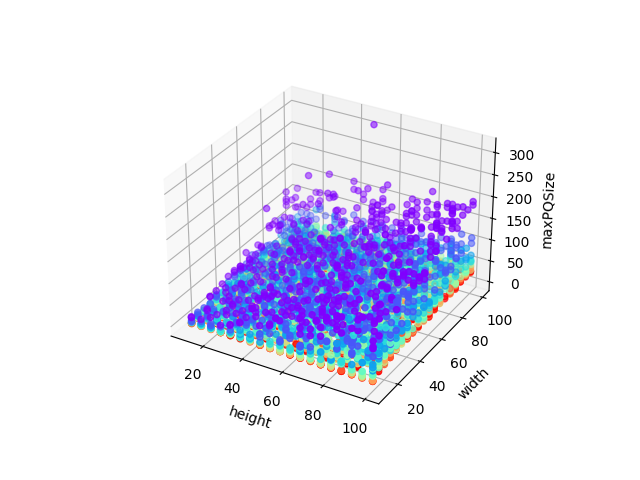

In [32]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.cm as cm 

colors = cm.rainbow(np.linspace(0, 1,np.max(results['processNum'])))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("height")
ax.set_ylabel("width")
ax.set_zlabel("maxPQSize")
target = results[(results['obstacleRatio']==40) & (results['neighborsNum']==8)].sample(n=5000)
ax.scatter3D(xs=target['height'], ys=target['width'] ,zs=target['MAXPQSize'], c=colors[target['processNum']-1])